In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1. Data Loading & Preprocessing

### 1.1. Loading Data

In [ ]:
assist_combined_df = pd.read_csv("/content/drive/Shareddrives/CIS 5450 Project/datasets/merged_nona_df.csv")
unemployment_df = pd.read_csv("/content/drive/Shareddrives/CIS 5450 Project/datasets/combined_laucnty.csv")

### 1.2. Analyzing Data Structures

#### 1.2.1. Analyzing Assist Combined Data Structure

In [ ]:
# show disaster_df
pd.set_option("display.max_columns", None)
assist_combined_df

,disasterNumber,declarationDate_a,incidentType_a,applicationTitle,applicantId,damageCategoryCode,county,countyCode,state_a,stateCode,stateNumberCode,projectAmount,federalShareObligated,totalObligated,obligatedDate,dcc,damageCategory,femaDeclarationString,state_d,declarationDate_d,incidentType_d,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,declarationRequestNumber,region,isLargeProject
0,1239,1998-08-26T00:00:00.000Z,Severe Storm,IMMEDIATE NEEDS FUNDING,465-19792-00,B - Protective Measures,Val Verde,465.0,Texas,TX,48.0,100000.00,75000.00,80340.00,1998-09-15T00:00:00.000Z,B,Protective Measures,DR-1239-TX,TX,1998-08-26T00:00:00.000Z,Severe Storm,TROPICAL STORM CHARLEY,0.0,1.0,1.0,1.0,1998-08-22T00:00:00.000Z,0.0,48.0,465.0,99465.0,98062.0,South,1
1,1239,1998-08-26T00:00:00.000Z,Severe Storm,(L),465-19792-01,F - Public Utilities,Val Verde,465.0,Texas,TX,48.0,423791.13,317843.35,333171.72,1998-09-17T00:00:00.000Z,F,Public Utilities,DR-1239-TX,TX,1998-08-26T00:00:00.000Z,Severe Storm,TROPICAL STORM CHARLEY,0.0,1.0,1.0,1.0,1998-08-22T00:00:00.000Z,0.0,48.0,465.0,99465.0,98062.0,South,1
2,1239,1998-08-26T00:00:00.000Z,Severe Storm,L,465-99465-00,C - Roads and Bridges,Val Verde,465.0,Texas,TX,48.0,66966.19,50224.64,53975.01,1998-09-21T00:00:00.000Z,C,Roads and Bridges,DR-1239-TX,TX,1998-08-26T00:00:00.000Z,Severe Storm,TROPICAL STORM CHARLEY,0.0,1.0,1.0,1.0,1998-08-22T00:00:00.000Z,0.0,48.0,465.0,99465.0,98062.0,South,1
3,1239,1998-08-26T00:00:00.000Z,Severe Storm,Not Provided,465-062A0-00,C - Roads and Bridges,Val Verde,465.0,Texas,TX,48.0,22305.00,16728.75,17745.86,1998-09-21T00:00:00.000Z,C,Roads and Bridges,DR-1239-TX,TX,1998-08-26T00:00:00.000Z,Severe Storm,TROPICAL STORM CHARLEY,0.0,1.0,1.0,1.0,1998-08-22T00:00:00.000Z,0.0,48.0,465.0,99465.0,98062.0,South,0
4,1239,1998-08-26T00:00:00.000Z,Severe Storm,Not Provided,465-19792-02,G - Recreational or Other,Val Verde,465.0,Texas,TX,48.0,19685.50,14764.13,15461.00,1998-09-23T00:00:00.000Z,G,Recreational or Other,DR-1239-TX,TX,1998-08-26T00:00:00.000Z,Severe Storm,TROPICAL STORM CHARLEY,0.0,1.0,1.0,1.0,1998-08-22T00:00:00.000Z,0.0,48.0,465.0,99465.0,98062.0,South,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722349,4722,2023-07-19T00:00:00.000Z,Flood,731302 - Township Wide Road Repair,073-67882-00,C - Roads and Bridges,Lac qui Parle,73.0,Minnesota,MN,27.0,14717.50,11038.13,11038.13,2023-10-26T00:00:00.000Z,C,Roads and Bridges,DR-4722-MN,MN,2023-07-19T00:00:00.000Z,Flood,SEVERE STORMS AND FLOODING,0.0,0.0,1.0,1.0,2023-04-11T00:00:00.000Z,0.0,27.0,73.0,99073.0,23069.0,Midwest,0
722350,4722,2023-07-19T00:00:00.000Z,Flood,733988 - Levy pumping cost,073-14968-00,B - Protective Measures,Lac qui Parle,73.0,Minnesota,MN,27.0,9712.53,7284.40,7284.40,2023-10-26T00:00:00.000Z,B,Protective Measures,DR-4722-MN,MN,2023-07-19T00:00:00.000Z,Flood,SEVERE STORMS AND FLOODING,0.0,0.0,1.0,1.0,2023-04-11T00:00:00.000Z,0.0,27.0,73.0,99073.0,23069.0,Midwest,0
722351,4722,2023-07-19T00:00:00.000Z,Flood,733540 - Ellsburg 4 damages Work Completed,137-18800-00,C - Roads and Bridges,St. Louis,137.0,Minnesota,MN,27.0,16917.82,12688.37,12688.37,2023-10-26T00:00:00.000Z,C,Roads and Bridges,DR-4722-MN,MN,2023-07-19T00:00:00.000Z,Flood,SEVERE STORMS AND FLOODING,0.0,0.0,1.0,1.0,2023-04-11T00:00:00.000Z,0.0,27.0,137.0,99137.0,23069.0,Midwest,0
722352,4722,2023-07-19T00:00:00.000Z,Flood,733620 - Northland Roads and Culvert,137-47050-00,C - Roads and Bridges,St. Louis,137.0,Minnesota,MN,27.0,16347.00,12260.25,12260.25,2023-10-26T00:00:00.000Z,C,Roads and Bridges,DR-4722-MN,MN,2023-07-19T00:00:00.000Z,Flood,SEVERE STORMS AND FLOODING,0.0,0.0,1.0,1.0,2023-04-11T00:00:00.000Z,0.0,27.0,137.0,99137.0,23069.0,Midwest,0


In [ ]:
# check data types of assist_combined_df
assist_combined_df.dtypes

disasterNumber                int64
declarationDate_a            object
incidentType_a               object
applicationTitle             object
applicantId                  object
damageCategoryCode           object
county                       object
countyCode                  float64
state_a                      object
stateCode                    object
stateNumberCode             float64
projectAmount               float64
federalShareObligated       float64
totalObligated              float64
obligatedDate                object
dcc                          object
damageCategory               object
femaDeclarationString        object
state_d                      object
declarationDate_d            object
incidentType_d               object
declarationTitle             object
ihProgramDeclared           float64
iaProgramDeclared           float64
paProgramDeclared           float64
hmProgramDeclared           float64
incidentBeginDate            object
tribalRequest               

#### 1.2.2. Analyzing Unemployment Data Structure

In [ ]:
# show unemployment_df
unemployment_df

,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate
0,CN0100100000000,1,1,"Autauga County, AL",1990,16936,15831,1105,6.5
1,CN0100300000000,1,3,"Baldwin County, AL",1990,46896,44429,2467,5.3
2,CN0100500000000,1,5,"Barbour County, AL",1990,11510,10604,906,7.9
3,CN0100700000000,1,7,"Bibb County, AL",1990,7449,6766,683,9.2
4,CN0100900000000,1,9,"Blount County, AL",1990,19196,17975,1221,6.4
...,...,...,...,...,...,...,...,...,...
106181,CN7214500000000,72,145,"Vega Baja Municipio, PR",2022,14232,13180,1052,7.4
106182,CN7214700000000,72,147,"Vieques Municipio, PR",2022,2742,2554,188,6.9
106183,CN7214900000000,72,149,"Villalba Municipio, PR",2022,7790,6982,808,10.4
106184,CN7215100000000,72,151,"Yabucoa Municipio, PR",2022,9278,8504,774,8.3


In [ ]:
# check data types of umemployment_df
unemployment_df.dtypes

LAUS Code                         object
State FIPS Code                    int64
County FIPS Code                   int64
County Name/State Abbreviation    object
Year                               int64
Labor Force                       object
Employed                          object
Unemployed                        object
Unemployment Rate                 object
dtype: object

In [ ]:
# check for null values in umemployment_df
print("number of null values in Lacor Force column:", len(unemployment_df[unemployment_df["Labor Force"] == "N.A."]), "\n")
unemployment_df.isna().sum()

number of null values in Lacor Force column: 92 



LAUS Code                         0
State FIPS Code                   0
County FIPS Code                  0
County Name/State Abbreviation    0
Year                              0
Labor Force                       0
Employed                          0
Unemployed                        0
Unemployment Rate                 0
dtype: int64

### 1.3. Preprocessing

#### 1.3.1. Cleaning Assist Combined Data

In [ ]:
# drop and rename duplicated columns
assist_combined_clean_df = assist_combined_df.drop(["state_d", "declarationDate_d", "incidentType_d", "countyCode", "stateNumberCode"], axis=1)
assist_combined_clean_df.rename(columns={"state_a": "state", "declarationDate_a": "declarationDate", "incidentType_a": "incidentType"}, inplace=True)

# create year and month columns
assist_combined_clean_df["incidentBeginDate"] = pd.to_datetime(assist_combined_clean_df["incidentBeginDate"])
assist_combined_clean_df["year"] = assist_combined_clean_df["incidentBeginDate"].dt.year
assist_combined_clean_df["month"] = assist_combined_clean_df["incidentBeginDate"].dt.month

# create a fipsCode column
for name in ["State", "County"]:
  assist_combined_clean_df[f"fips{name}Code"] = assist_combined_clean_df[f"fips{name}Code"].astype(int)

assist_combined_clean_df["fipsCode"] = assist_combined_clean_df["fipsStateCode"].apply(lambda x: str(x).zfill(2)) + assist_combined_clean_df["fipsCountyCode"].apply(lambda x: str(x).zfill(3))
assist_combined_clean_df = assist_combined_clean_df.drop(["fipsStateCode", "fipsCountyCode"], axis=1)

# drop unnecessary columns
unnecessary_columns = ["declarationDate", "applicationTitle", "applicantId", "femaDeclarationString", "obligatedDate", "dcc", "incidentBeginDate", "damageCategoryCode", "placeCode", "declarationRequestNumber"]
assist_combined_clean_df = assist_combined_clean_df.drop(unnecessary_columns, axis=1)

In [ ]:
# check unique values in boolean columns
boolean_columns = ["ihProgramDeclared", "iaProgramDeclared",	"paProgramDeclared", "hmProgramDeclared", "tribalRequest"]

print("< Unique Values in Boolean Columns >\n")

for column in boolean_columns:
  print(f"{column}: {assist_combined_clean_df[column].unique()}")

< Unique Values in Boolean Columns >

ihProgramDeclared: [0. 1.]
iaProgramDeclared: [1. 0.]
paProgramDeclared: [1. 0.]
hmProgramDeclared: [1. 0.]
tribalRequest: [0. 1.]


In [ ]:
# convert programDeclared columns into int type
for column in boolean_columns:
  assist_combined_clean_df[column] = assist_combined_clean_df[column].astype(int)

In [ ]:
# show assist_combined_clean_df
assist_combined_clean_df.head()

,disasterNumber,incidentType,county,state,stateCode,projectAmount,federalShareObligated,totalObligated,damageCategory,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,tribalRequest,region,isLargeProject,year,month,fipsCode
0,1239,Severe Storm,Val Verde,Texas,TX,100000.00,75000.00,80340.00,Protective Measures,TROPICAL STORM CHARLEY,0,1,1,1,0,South,1,1998,8,48465
1,1239,Severe Storm,Val Verde,Texas,TX,423791.13,317843.35,333171.72,Public Utilities,TROPICAL STORM CHARLEY,0,1,1,1,0,South,1,1998,8,48465
2,1239,Severe Storm,Val Verde,Texas,TX,66966.19,50224.64,53975.01,Roads and Bridges,TROPICAL STORM CHARLEY,0,1,1,1,0,South,1,1998,8,48465
3,1239,Severe Storm,Val Verde,Texas,TX,22305.00,16728.75,17745.86,Roads and Bridges,TROPICAL STORM CHARLEY,0,1,1,1,0,South,0,1998,8,48465
4,1239,Severe Storm,Val Verde,Texas,TX,19685.50,14764.13,15461.00,Recreational or Other,TROPICAL STORM CHARLEY,0,1,1,1,0,South,0,1998,8,48465


#### 1.3.2. Cleaning Unemployment Data

In [ ]:
# create a fipsCode column
unemployment_clean_df = unemployment_df.copy()
unemployment_clean_df["fipsCode"] = unemployment_clean_df["State FIPS Code"].apply(lambda x: str(x).zfill(2)) + unemployment_clean_df["County FIPS Code"].apply(lambda x: str(x).zfill(3))

# drop unnecessary columns and rows with null values
unemployment_clean_df = unemployment_clean_df.drop(["LAUS Code", "State FIPS Code", "County FIPS Code", "County Name/State Abbreviation", "Employed", "Unemployed"], axis=1)
unemployment_clean_df = unemployment_clean_df[unemployment_clean_df["Labor Force"] != "N.A."]

# rename columns and convert into int type
unemployment_clean_df.columns = ["year", "laborForce", "unemploymentRate", "fipsCode"]

unemployment_clean_df["laborForce"] = unemployment_clean_df["laborForce"].astype(int)
unemployment_clean_df["unemploymentRate"] = unemployment_clean_df["unemploymentRate"].astype(float)

In [ ]:
# show unemployment_clean_df
unemployment_clean_df.head()

,year,laborForce,unemploymentRate,fipsCode
0,1990,16936,6.5,01001
1,1990,46896,5.3,01003
2,1990,11510,7.9,01005
3,1990,7449,9.2,01007
4,1990,19196,6.4,01009


#### 1.3.3. Combining Data & Cleaning Merged Data

In [ ]:
# check the periods of disaster_clean_df and unemployment_clean_df
min_assist = assist_combined_clean_df["year"].min()
max_assist = assist_combined_clean_df["year"].max()

min_unemployment = unemployment_clean_df["year"].min()
max_unemployment = unemployment_clean_df["year"].max()

print(f"period of assist combined data: {min_assist} ~ {max_assist}")
print(f"period of unemployment data: {min_unemployment} ~ {max_unemployment}")

period of assist combined data: 1998 ~ 2023
period of unemployment data: 1990 ~ 2022


In [ ]:
# merge on year and fipsCode
fema_df = pd.merge(assist_combined_clean_df, unemployment_clean_df, on=["year", "fipsCode"])

In [ ]:
# show fema_df
fema_df.head()

,incidentType,county,state,stateCode,projectAmount,federalShareObligated,totalObligated,damageCategory,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,tribalRequest,region,isLargeProject,year,month,fipsCode,laborForce,unemploymentRate
0,Severe Storm,Val Verde,Texas,TX,100000.00,75000.00,80340.00,Protective Measures,TROPICAL STORM CHARLEY,0,1,1,1,0,South,1,1998,8,48465,17916,9.7
1,Severe Storm,Val Verde,Texas,TX,423791.13,317843.35,333171.72,Public Utilities,TROPICAL STORM CHARLEY,0,1,1,1,0,South,1,1998,8,48465,17916,9.7
2,Severe Storm,Val Verde,Texas,TX,66966.19,50224.64,53975.01,Roads and Bridges,TROPICAL STORM CHARLEY,0,1,1,1,0,South,1,1998,8,48465,17916,9.7
3,Severe Storm,Val Verde,Texas,TX,22305.00,16728.75,17745.86,Roads and Bridges,TROPICAL STORM CHARLEY,0,1,1,1,0,South,0,1998,8,48465,17916,9.7
4,Severe Storm,Val Verde,Texas,TX,19685.50,14764.13,15461.00,Recreational or Other,TROPICAL STORM CHARLEY,0,1,1,1,0,South,0,1998,8,48465,17916,9.7


## Part 2. Feature Engineering

### 2.1. One Hot Encoding

In [ ]:
# check unique values in categorical columns
categorical_columns = ["incidentType", "damageCategory", "declarationTitle", "year", "month", "region"]
unique_list = []

for column in categorical_columns:
  nunique = fema_df[column].nunique()
  values = dict(fema_df[column].value_counts().items())
  unique_list.append({"column": column, "count": nunique, "value": values})

pd.options.display.max_colwidth = 1000
unique_df = pd.DataFrame(unique_list)
unique_df

,column,count,value
0,incidentType,19,"{'Severe Storm': 287568, 'Hurricane': 181639, 'Flood': 74670, 'Biological': 38210, 'Snowstorm': 32798, 'Severe Ice Storm': 21558, 'Fire': 7194, 'Tornado': 5393, 'Earthquake': 2932, 'Coastal Storm': 2678, 'Other': 922, 'Dam/Levee Break': 177, 'Freezing': 173, 'Tsunami': 130, 'Mud/Landslide': 114, 'Winter Storm': 88, 'Terrorist': 85, 'Volcanic Eruption': 54, 'Chemical': 41}"
1,damageCategory,8,"{'Roads and Bridges': 222707, 'Protective Measures': 195144, 'Public Buildings': 75103, 'Debris Removal': 72737, 'Recreational or Other': 36090, 'Public Utilities': 30553, 'State Management': 12544, 'Water Control Facilities': 11546}"
2,declarationTitle,361,"{'SEVERE STORMS AND FLOODING': 96087, 'SEVERE STORMS, TORNADOES, AND FLOODING': 45348, 'COVID-19 PANDEMIC': 38180, 'HURRICANE IRENE': 18500, 'SEVERE STORMS, TORNADOES, STRAIGHT-LINE WINDS, AND FLOODING': 13335, 'FLOODING': 13260, 'SEVERE WINTER STORM AND SNOWSTORM': 13255, 'SEVERE STORMS, FLOODING, AND TORNADOES': 12739, 'HURRICANE IKE': 12298, 'SEVERE WINTER STORM': 11989, 'HURRICANE KATRINA': 11756, 'SNOW': 11729, 'HURRICANE SANDY': 11361, 'HURRICANE IRMA': 9029, 'HURRICANE MARIA': 8567, 'HURRICANE FLOYD MAJOR DISASTER DECLARATIONS': 8503, 'SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSLIDES': 8039, 'HURRICANE WILMA': 7311, 'SEVERE WINTER ICE STORM': 7299, 'HURRICANE FRANCES': 7245, 'HURRICANE IVAN': 6717, 'TROPICAL STORM IRENE': 6167, 'SEVERE WINTER STORMS': 5866, 'HURRICANE HARVEY': 5846, 'SEVERE WINTER STORMS, FLOODING, AND MUDSLIDES': 5834, 'HURRICANE RITA ': 5553, 'SEVERE STORMS AND INLAND AND COASTAL FLOODING': 5345, 'SEVERE STORMS, TORNADOES AND FLOODING': 5275, 'HURRICANE ..."
3,year,25,"{2011: 72754, 2008: 62350, 2004: 50766, 2020: 48950, 2005: 45501, 2010: 38708, 2009: 35215, 2007: 34085, 2017: 32942, 2003: 24912, 2006: 21176, 1999: 20834, 2000: 19947, 2012: 19854, 2019: 18664, 2001: 17733, 2002: 14407, 2018: 14032, 2015: 13338, 2013: 12436, 2016: 12245, 2021: 11239, 2014: 6655, 2022: 5356, 1998: 2325}"
4,month,12,"{9: 114249, 8: 78175, 1: 72970, 4: 60645, 3: 56996, 5: 53739, 6: 50539, 12: 49349, 10: 49252, 2: 39730, 7: 21386, 11: 9394}"
5,region,5,"{'South': 269179, 'Midwest': 169635, 'Northeast': 157307, 'West': 45205, 'TerritoryOther': 15098}"


In [ ]:
# one hot encode categorical columns excluding declarationTitle
fema_onehot_df = pd.get_dummies(fema_df, columns = ["incidentType", "damageCategory", "month", "year", "region"])

In [ ]:
# show fema_onehot_df
fema_onehot_df.head()

,county,state,stateCode,projectAmount,federalShareObligated,totalObligated,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,tribalRequest,isLargeProject,fipsCode,laborForce,unemploymentRate,incidentType_Biological,incidentType_Chemical,incidentType_Coastal Storm,incidentType_Dam/Levee Break,incidentType_Earthquake,incidentType_Fire,incidentType_Flood,incidentType_Freezing,incidentType_Hurricane,incidentType_Mud/Landslide,incidentType_Other,incidentType_Severe Ice Storm,incidentType_Severe Storm,incidentType_Snowstorm,incidentType_Terrorist,incidentType_Tornado,incidentType_Tsunami,incidentType_Volcanic Eruption,incidentType_Winter Storm,damageCategory_Debris Removal,damageCategory_Protective Measures,damageCategory_Public Buildings,damageCategory_Public Utilities,damageCategory_Recreational or Other,damageCategory_Roads and Bridges,damageCategory_State Management,damageCategory_Water Control Facilities,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,region_Midwest,region_Northeast,region_South,region_TerritoryOther,region_West
0,Val Verde,Texas,TX,100000.00,75000.00,80340.00,TROPICAL STORM CHARLEY,0,1,1,1,0,1,48465,17916,9.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Val Verde,Texas,TX,423791.13,317843.35,333171.72,TROPICAL STORM CHARLEY,0,1,1,1,0,1,48465,17916,9.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Val Verde,Texas,TX,66966.19,50224.64,53975.01,TROPICAL STORM CHARLEY,0,1,1,1,0,1,48465,17916,9.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Val Verde,Texas,TX,22305.00,16728.75,17745.86,TROPICAL STORM CHARLEY,0,1,1,1,0,0,48465,17916,9.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Val Verde,Texas,TX,19685.50,14764.13,15461.00,TROPICAL STORM CHARLEY,0,1,1,1,0,0,48465,17916,9.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# create a function to cast text into camel case
def to_camel_case(text):
  words = text.split()
  return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# create a dictionary to rename months
month_dict = {1: "january", 2: "february", 3: "march", 4: "april", 5: "may", 6: "june", 7: "july", 8: "august", 9: "september", 10: "october", 11: "november", 12: "december"}

# create a dictionary to rename columns
columns = fema_onehot_df.columns
rename_dict = {"disasterNumber": "disasterCount"}

for column in columns:
  if "incidentType" in column:
    split_column = column.split("_")
    rename_dict[column] = to_camel_case(split_column[1] + " Disaster")
  elif "damageCategory" in column:
    split_column = column.split("_")
    rename_dict[column] = to_camel_case(split_column[1] + " Damage")
  elif "month" in column:
    split_column = column.split("_")
    rename_dict[column] = month_dict[int(split_column[1])]
  elif "year" in column:
    split_column = column.split("_")
    rename_dict[column] = split_column[1]
  elif "region" in column:
    split_column = column.split("_")
    rename_dict[column] = to_camel_case(split_column[1] + " Region")

# rename columns
fema_clean_df = fema_onehot_df.rename(columns=rename_dict)

# drop unnecessary columns
fema_clean_df = fema_clean_df.drop(["county",	"state", "stateCode", "federalShareObligated", "declarationTitle", "fipsCode"], axis=1)

In [ ]:
# show fema_clean_df
fema_clean_df

,projectAmount,totalObligated,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,tribalRequest,isLargeProject,laborForce,unemploymentRate,biologicalDisaster,chemicalDisaster,coastalStormDisaster,dam/leveeBreakDisaster,earthquakeDisaster,fireDisaster,floodDisaster,freezingDisaster,hurricaneDisaster,mud/landslideDisaster,otherDisaster,severeIceStormDisaster,severeStormDisaster,snowstormDisaster,terroristDisaster,tornadoDisaster,tsunamiDisaster,volcanicEruptionDisaster,winterStormDisaster,debrisRemovalDamage,protectiveMeasuresDamage,publicBuildingsDamage,publicUtilitiesDamage,recreationalOrOtherDamage,roadsAndBridgesDamage,stateManagementDamage,waterControlFacilitiesDamage,january,february,march,april,may,june,july,august,september,october,november,december,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,midwestRegion,northeastRegion,southRegion,territoryotherRegion,westRegion
0,100000.00,80340.00,0,1,1,1,0,1,17916,9.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,423791.13,333171.72,0,1,1,1,0,1,17916,9.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,66966.19,53975.01,0,1,1,1,0,1,17916,9.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,22305.00,17745.86,0,1,1,1,0,0,17916,9.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,19685.50,15461.00,0,1,1,1,0,0,17916,9.7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656419,20565.87,20565.87,0,0,1,1,0,0,19877,4.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
656420,7000.00,7000.00,0,0,1,1,0,0,19877,4.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
656421,27551.26,20663.45,0,0,1,1,0,0,19877,4.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
656422,5000.00,3750.00,0,0,1,1,0,0,19877,4.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
fema_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656424 entries, 0 to 656423
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   projectAmount                 656424 non-null  float64
 1   totalObligated                656424 non-null  float64
 2   ihProgramDeclared             656424 non-null  int64  
 3   iaProgramDeclared             656424 non-null  int64  
 4   paProgramDeclared             656424 non-null  int64  
 5   hmProgramDeclared             656424 non-null  int64  
 6   tribalRequest                 656424 non-null  int64  
 7   isLargeProject                656424 non-null  int64  
 8   laborForce                    656424 non-null  int64  
 9   unemploymentRate              656424 non-null  float64
 10  biologicalDisaster            656424 non-null  uint8  
 11  chemicalDisaster              656424 non-null  uint8  
 12  coastalStormDisaster          656424 non-nul

### 3.2. Feature Correlation Heatmap

#### 3.2.1. Correlation Heatmap: Disasters

In [ ]:
# create dataframe to compute correlation of disasters
disaster_columns = ['totalObligated']

for column in fema_clean_df.columns:
  if "Disaster" in column:
    disaster_columns.append(column)

corr_disaster_df = fema_clean_df[disaster_columns]

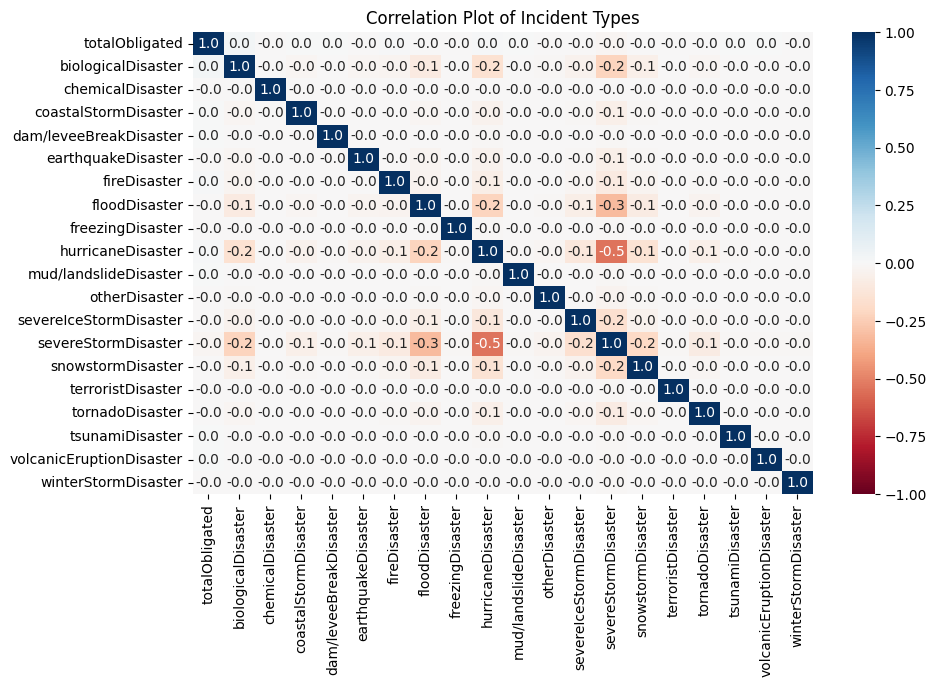

In [ ]:
# plot correlation of disasters
plt.figure(figsize=(10, 6))
fig = sns.heatmap(data=corr_disaster_df.corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True, fmt=".1f")

plt.title("Correlation Plot of Incident Types")
plt.show()

#### 3.2.2. Correlation Heatmap: Damage

In [ ]:
# create dataframe to compute correlation of damages
damage_columns = []

for column in fema_clean_df.columns:
  if "Damage" in column:
    damage_columns.append(column)

corr_damage_df = fema_clean_df[damage_columns]

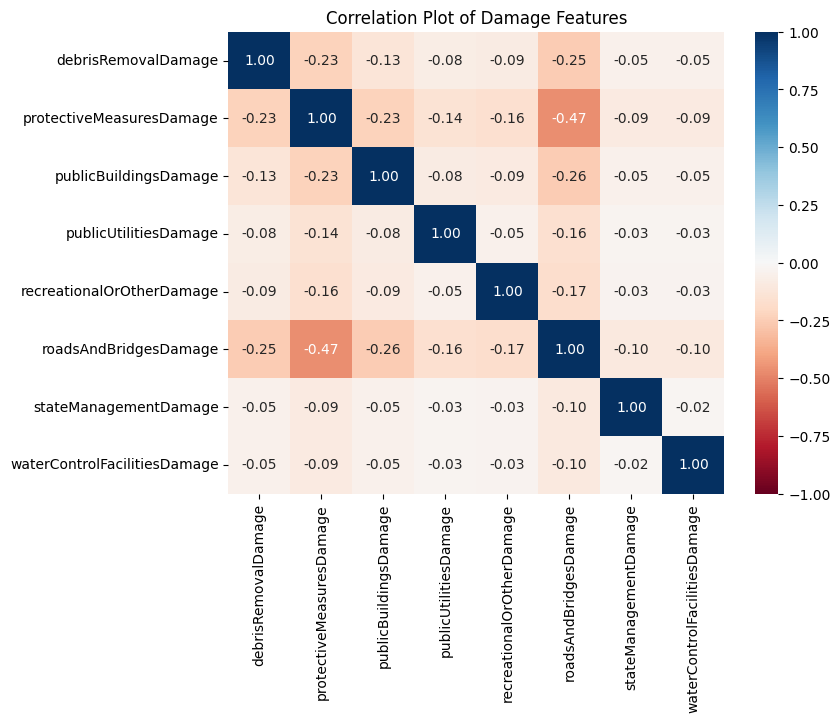

In [ ]:
# plot correlation of damages
plt.figure(figsize=(8, 6))
fig = sns.heatmap(data=corr_damage_df.corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True, fmt=".2f")

plt.title("Correlation Plot of Damage Features")
plt.show()

#### 3.2.3. Correlation Heatmap: Project Type

In [ ]:
# create dataframe to compute correlation of project and work force features
project_columns = ["laborForce", "unemploymentRate"]

for column in fema_clean_df.columns:
  if "ProgramDeclared" in column or "Project" in column:
    project_columns.append(column)

corr_project_df = fema_clean_df[project_columns]

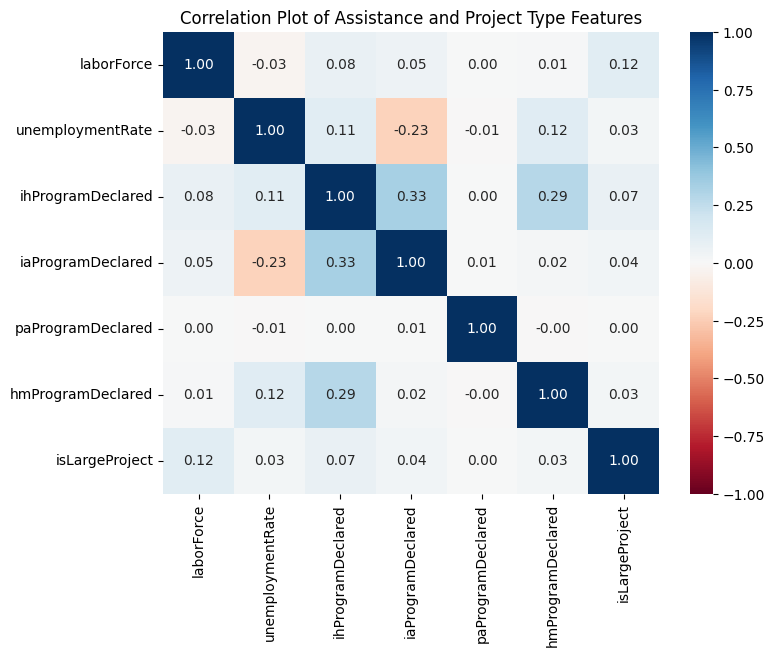

In [ ]:
# plot correlation between assistance and project type
plt.figure(figsize=(8, 6))
fig = sns.heatmap(data=corr_project_df.corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True, fmt=".2f")

plt.title("Correlation Plot of Assistance and Project Type Features")
plt.show()

### 3.3. Principal Component Analysis

#### 3.3.1. Spliting Train & Test Data

In [ ]:
# drop categorical column to fit PCA
fema_drop_df = fema_clean_df.drop(["projectAmount"], axis=1)

# create features and targetdataframes
features = fema_drop_df.drop("totalObligated", axis=1)
target = fema_drop_df["totalObligated"]

In [ ]:
# conduct 80/20 train-test split
seed = 0
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state = seed)

#### 3.3.2. PCA

In [ ]:
# address scale-invariance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initiate and fit PCA
pca = PCA()
pca_data = pca.fit(X_train_scaled)

In [ ]:
# compute cumulative explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = np.cumsum(explained_variance_ratios)
cum_dummy_evr = np.insert(cum_evr, 0, 0) # dummy variable so the number of components starts at 1

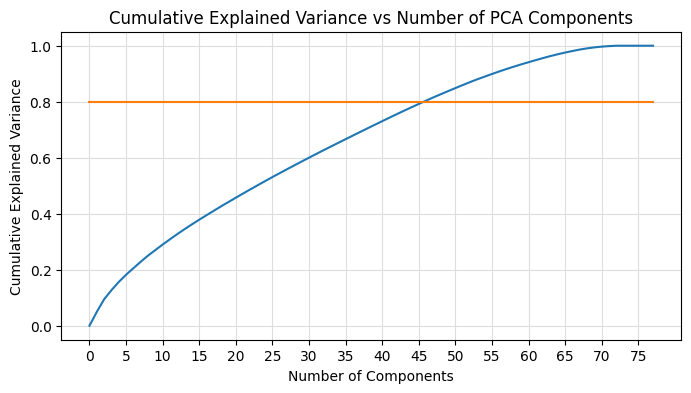

In [ ]:
# plot explained variance ratios
x_ticks = np.arange(len(cum_dummy_evr))

plt.figure(figsize=(8, 4))
sns.lineplot(x=x_ticks, y=cum_dummy_evr)
sns.lineplot(x=x_ticks, y=0.8 * np.ones(len(cum_dummy_evr)))

plt.title("Cumulative Explained Variance vs Number of PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(np.arange(0, len(cum_dummy_evr), 5))
plt.grid(color="#dddddd")

plt.show()

46 components explain more than 80% of the variance in the original dataset.

In [ ]:
# refit PCA with 46 components
pca = PCA(n_components=46)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Part 4: Modeling

### 4.1. Unsupervised Learning

In [ ]:
# standardize whole dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(fema_drop_df)

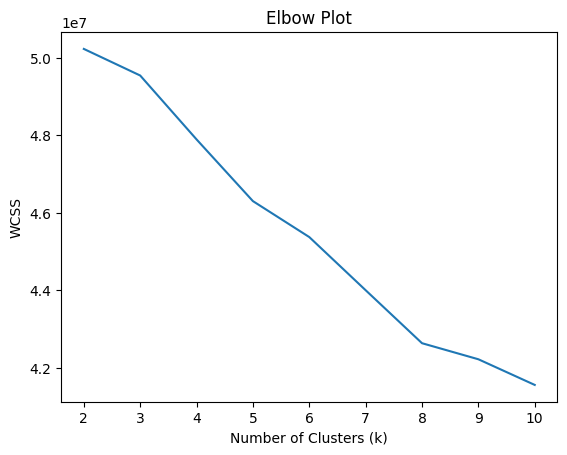

In [ ]:
# generate an elbow plot
distortion_df = pd.DataFrame(columns=["k", "distortion"])

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, n_init="auto", random_state=0)
  kmeans.fit(data_scaled) # use scaled data to interpret results

  new_distortion = pd.DataFrame({"k": [k], "distortion": [kmeans.inertia_]})
  distortion_df = pd.concat([distortion_df, new_distortion], ignore_index=True)

sns.lineplot(distortion_df, x="k", y="distortion")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Plot")

plt.show()

The distortion is observed to be optimal at k = 8. However, the absence of a distinct elbow point and the relatively high WCSS present concerns.

In [ ]:
# refit KMeans on PCA data with 8 clusters
kmeans = KMeans(n_clusters=8, n_init="auto", random_state=0)
kmeans = kmeans.fit(data_scaled)

In [ ]:
# create dataframe with scaled data
kmeans_df = pd.DataFrame(data_scaled)
kmeans_df.columns = fema_drop_df.columns
kmeans_df.index = fema_drop_df.index

# add cluster values to the dataframe
clusters = kmeans.labels_.tolist()
kmeans_df["cluster"] = clusters

In [ ]:
# show scaled data with clusters
kmeans_df.head()

,totalObligated,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,tribalRequest,isLargeProject,laborForce,unemploymentRate,biologicalDisaster,chemicalDisaster,coastalStormDisaster,dam/leveeBreakDisaster,earthquakeDisaster,fireDisaster,floodDisaster,freezingDisaster,hurricaneDisaster,mud/landslideDisaster,otherDisaster,severeIceStormDisaster,severeStormDisaster,snowstormDisaster,terroristDisaster,tornadoDisaster,tsunamiDisaster,volcanicEruptionDisaster,winterStormDisaster,debrisRemovalDamage,protectiveMeasuresDamage,publicBuildingsDamage,publicUtilitiesDamage,recreationalOrOtherDamage,roadsAndBridgesDamage,stateManagementDamage,waterControlFacilitiesDamage,january,february,march,april,may,june,july,august,september,october,november,december,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,midwestRegion,northeastRegion,southRegion,territoryotherRegion,westRegion,cluster
0,-0.012800,-1.060525,1.477039,0.020435,0.278919,-0.006414,2.465646,-0.378545,1.236167,-0.24861,-0.007903,-0.064003,-0.016423,-0.066983,-0.105265,-0.358264,-0.016236,-0.618523,-0.013179,-0.037504,-0.184274,1.132552,-0.22933,-0.01138,-0.091015,-0.014074,-0.00907,-0.011579,-0.353011,1.537463,-0.359435,-0.220945,-0.241202,-0.716578,-0.139578,-0.133806,-0.353646,-0.253819,-0.308357,-0.319047,-0.298607,-0.288814,-0.183512,2.719716,-0.459046,-0.284811,-0.120493,-0.285114,16.772981,-0.18105,-0.17703,-0.166627,-0.149801,-0.198616,-0.289516,-0.272909,-0.182579,-0.234028,-0.323965,-0.238092,-0.250326,-0.353057,-0.176604,-0.138964,-0.101203,-0.144016,-0.137872,-0.22986,-0.147795,-0.17107,-0.283865,-0.131984,-0.0907,-0.59032,-0.561401,1.199423,-0.153434,-0.271954,1
1,0.039042,-1.060525,1.477039,0.020435,0.278919,-0.006414,2.465646,-0.378545,1.236167,-0.24861,-0.007903,-0.064003,-0.016423,-0.066983,-0.105265,-0.358264,-0.016236,-0.618523,-0.013179,-0.037504,-0.184274,1.132552,-0.22933,-0.01138,-0.091015,-0.014074,-0.00907,-0.011579,-0.353011,-0.650422,-0.359435,4.526010,-0.241202,-0.716578,-0.139578,-0.133806,-0.353646,-0.253819,-0.308357,-0.319047,-0.298607,-0.288814,-0.183512,2.719716,-0.459046,-0.284811,-0.120493,-0.285114,16.772981,-0.18105,-0.17703,-0.166627,-0.149801,-0.198616,-0.289516,-0.272909,-0.182579,-0.234028,-0.323965,-0.238092,-0.250326,-0.353057,-0.176604,-0.138964,-0.101203,-0.144016,-0.137872,-0.22986,-0.147795,-0.17107,-0.283865,-0.131984,-0.0907,-0.59032,-0.561401,1.199423,-0.153434,-0.271954,1
2,-0.018206,-1.060525,1.477039,0.020435,0.278919,-0.006414,2.465646,-0.378545,1.236167,-0.24861,-0.007903,-0.064003,-0.016423,-0.066983,-0.105265,-0.358264,-0.016236,-0.618523,-0.013179,-0.037504,-0.184274,1.132552,-0.22933,-0.01138,-0.091015,-0.014074,-0.00907,-0.011579,-0.353011,-0.650422,-0.359435,-0.220945,-0.241202,1.395521,-0.139578,-0.133806,-0.353646,-0.253819,-0.308357,-0.319047,-0.298607,-0.288814,-0.183512,2.719716,-0.459046,-0.284811,-0.120493,-0.285114,16.772981,-0.18105,-0.17703,-0.166627,-0.149801,-0.198616,-0.289516,-0.272909,-0.182579,-0.234028,-0.323965,-0.238092,-0.250326,-0.353057,-0.176604,-0.138964,-0.101203,-0.144016,-0.137872,-0.22986,-0.147795,-0.17107,-0.283865,-0.131984,-0.0907,-0.59032,-0.561401,1.199423,-0.153434,-0.271954,1
3,-0.025635,-1.060525,1.477039,0.020435,0.278919,-0.006414,-0.405573,-0.378545,1.236167,-0.24861,-0.007903,-0.064003,-0.016423,-0.066983,-0.105265,-0.358264,-0.016236,-0.618523,-0.013179,-0.037504,-0.184274,1.132552,-0.22933,-0.01138,-0.091015,-0.014074,-0.00907,-0.011579,-0.353011,-0.650422,-0.359435,-0.220945,-0.241202,1.395521,-0.139578,-0.133806,-0.353646,-0.253819,-0.308357,-0.319047,-0.298607,-0.288814,-0.183512,2.719716,-0.459046,-0.284811,-0.120493,-0.285114,16.772981,-0.18105,-0.17703,-0.166627,-0.149801,-0.198616,-0.289516,-0.272909,-0.182579,-0.234028,-0.323965,-0.238092,-0.250326,-0.353057,-0.176604,-0.138964,-0.101203,-0.144016,-0.137872,-0.22986,-0.147795,-0.17107,-0.283865,-0.131984,-0.0907,-0.59032,-0.561

In [ ]:
# compute the statistics for each cluster
cluster_stats_df = kmeans_df.groupby("cluster").mean()
cluster_stats_df

,totalObligated,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,tribalRequest,isLargeProject,laborForce,unemploymentRate,biologicalDisaster,chemicalDisaster,coastalStormDisaster,dam/leveeBreakDisaster,earthquakeDisaster,fireDisaster,floodDisaster,freezingDisaster,hurricaneDisaster,mud/landslideDisaster,otherDisaster,severeIceStormDisaster,severeStormDisaster,snowstormDisaster,terroristDisaster,tornadoDisaster,tsunamiDisaster,volcanicEruptionDisaster,winterStormDisaster,debrisRemovalDamage,protectiveMeasuresDamage,publicBuildingsDamage,publicUtilitiesDamage,recreationalOrOtherDamage,roadsAndBridgesDamage,stateManagementDamage,waterControlFacilitiesDamage,january,february,march,april,may,june,july,august,september,october,november,december,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,midwestRegion,northeastRegion,southRegion,territoryotherRegion,westRegion
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.018762,0.497727,0.413859,0.020435,0.184458,-0.006414,0.166801,0.273581,-0.091605,-0.248610,-0.007903,0.095162,-0.016423,-0.051641,0.264765,-0.357659,-0.016236,1.479423,-0.013179,-0.037504,-0.184274,-0.860577,-0.229330,0.011966,-0.089012,-0.014074,-0.00907,-0.011579,0.139661,-0.012047,0.435734,0.036061,0.160771,-0.464823,0.050283,-0.061485,-0.353268,-0.253701,-0.308297,-0.312255,-0.298607,-0.258834,-0.046965,0.685489,0.748946,0.303738,-0.047349,-0.274610,-0.059620,0.165935,-0.177030,-0.075497,-0.079435,-0.049296,0.359934,0.375233,-0.182579,-0.217521,0.063593,-0.237590,-0.242072,0.095093,0.271470,-0.138342,-0.101203,-0.139730,-0.137872,0.175061,0.074325,-0.130568,-0.125102,0.132311,-0.015871,-0.586743,0.036598,0.628740,-0.153434,-0.177739
1,-0.021699,-0.130776,0.077686,-0.001057,0.133319,-0.006414,-0.112579,-0.145512,0.009787,-0.248610,-0.007903,-0.019376,-0.006206,-0.038026,-0.094947,-0.358264,-0.016236,-0.614088,-0.013179,-0.037504,-0.184274,1.078477,-0.229330,-0.011380,0.115420,-0.014074,0.01218,-0.011579,-0.020389,-0.265703,-0.132546,0.026619,-0.047322,0.378369,-0.090385,0.064236,-0.190628,-0.089085,0.070608,0.260945,0.341560,0.287356,0.109464,-0.227894,-0.325553,-0.104634,0.016810,0.071517,-0.027658,-0.101647,0.052296,-0.044138,0.022477,0.023197,-0.055694,-0.085958,0.200658,0.237763,0.131268,0.243169,0.134353,-0.052156,-0.057670,0.056522,0.028376,0.115227,-0.137872,-0.161608,-0.078083,-0.134564,-0.251176,-0.073986,-0.043209,0.234539,-0.072317,-0.124814,-0.153434,0.049701
2,0.051629,0.551208,-0.445758,0.010707,0.198810,-0.006414,0.536159,-0.367694,2.536444,-0.248610,-0.007903,-0.064003,-0.016423,0.283638,-0.094450,-0.358264,-0.016236,0.984871,-0.013179,-0.037504,-0.184274,-0.362597,-0.229330,-0.011380,-0.091015,-0.014074,-0.00907,-0.011579,-0.178086,-0.476382,0.159514,-0.148002,0.441650,0.318627,0.127951,-0.114156,-0.353646,-0.253819,-0.308357,-0.319047,-0.125871,-0.288814,-0.183512,-0.106551,1.472156,-0.025849,0.252030,-0.196443,-0.059620,-0.181050,-0.177030,0.033555,-0.149801,-0.061002,-0.061402,-0.157126,-0.182579,-0.234028,-0.192488,-0.233095,-0.024827,-0.028139,-0.176604,-0.138964,-0.101203,-0.144016,-0.137872,2.396144,-0.147795,-0.030398,-0.283865,-0.131984,0.569726,-0.590320,-0.561401,-0.833734,6.517480,-0.271954
3,-0.018382,-0.523829,-0.400804,-0.022508,0.087210,-0.006414,-0.056421,-0.182781,-0.337661,-0.248610,-0.007903,-0.046599,-0.016423,0.292245,-0.103903,2.474872,0.121246,-0.615265,0.084714,-0.037504,-0.184274,-0.750340,-0.229330,-0.011380,-0.072724,0.105100,-0.00907,0.086469,-0.102905,-0.334553,-0.198673,0.020683,-0.025644,0.432023,0.243329,0.091894,-0.232790,0.547235,0.706675,0.200283,-0.161076,-0.014833,-0.024678,-0.300658,-0.218202,-0.120335,-0.059780,-0.162663,0.297564,-0.009819,-0.152531,0.439819,0.030161,-0.196725,-0.289516,-0.264376,-0.143739,-0.221935,-0.262765,-0.146263,0.075935,0.330575,-0.139019,0.291081,0.150022,0.062703,-0.137872,-0.020465,0.305808,1.025706,

💡 Future Work

Analyze the properties of each cluster and name the clusters (based on ChatGPT). Subsequently, conduct supervised learning for each identified cluster. However, considering the substantial number of clusters, if there are no distinct properties discernible between these clusters, it may be feasible to proceed with supervised learning without implementing clustering.

### 4.2. Supervised Learning

#### 4.2.1. Linear Regression

In [ ]:
# initialize model and fit it on the training set
lin_reg = LinearRegression()
lin_reg.fit(X_train_pca, y_train)

# predict on the test set
y_pred = lin_reg.predict(X_test_pca)

# compute the R-squared score and MSE
lin_reg_score_train = lin_reg.score(X_train_pca, y_train)
lin_reg_score_test = lin_reg.score(X_test_pca, y_test)
lin_reg_mse = mean_squared_error(y_test, y_pred)

print("< Linear Regression >\n")
print(f"Train R-squared score: {lin_reg_score_train}")
print(f"Test R-squared score: {lin_reg_score_test}")
print(f"MSE: {lin_reg_mse}")

< Linear Regression >

Train R-squared score: 0.0036997447507737258
Test R-squared score: 0.004175723010358179
MSE: 21395630586431.19


In [ ]:
# fit model with original data
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# compute the R-squared score and MSE
lin_reg_score_train = lin_reg.score(X_train, y_train)
lin_reg_score_test = lin_reg.score(X_test, y_test)
lin_reg_mse = mean_squared_error(y_test, y_pred)

print("< Linear Regression with Original Data>\n")
print(f"Train R-squared score: {lin_reg_score_train}")
print(f"Test R-squared score: {lin_reg_score_test}")
print(f"MSE: {lin_reg_mse}")

< Linear Regression with Original Data>

Train R-squared score: 0.005557144847677664
Test R-squared score: 0.006635912303487812
MSE: 21342772564685.008


#### 4.2.2. Lasso Regression

In [ ]:
# initialize model and fit it on the training set
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X_train_pca, y_train)

# predict on the test set
y_pred = lasso_reg.predict(X_test_pca)

# TODO: Find the R-squared score
lasso_reg_score_train = lasso_reg.score(X_train_pca, y_train)
lasso_reg_score_test = lasso_reg.score(X_test_pca, y_test)
lasso_reg_mse = mean_squared_error(y_test, y_pred)

print("< Lasso Regression >\n")
print(f"Train R-squared score: {lasso_reg_score_train}")
print(f"Test R-squared score: {lasso_reg_score_test}")
print(f"MSE: {lasso_reg_mse}")

< Lasso Regression >

Train R-squared score: 0.003699744750380818
Test R-squared score: 0.0041757253195942035
MSE: 21395630536816.45


In [ ]:
# fit model with original data
lasso_reg.fit(X_train_scaled, y_train)
y_pred = lasso_reg.predict(X_test_scaled)

# compute the R-squared score and MSE
lasso_reg_score_train = lasso_reg.score(X_train_scaled, y_train)
lasso_reg_score_test = lasso_reg.score(X_test_scaled, y_test)
lasso_reg_mse = mean_squared_error(y_test, y_pred)

print("< Lasso Regression with Original Data >\n")
print(f"Train R-squared score: {lasso_reg_score_train}")
print(f"Test R-squared score: {lasso_reg_score_test}")
print(f"MSE: {lasso_reg_mse}")

< Lasso Regression with Original Data >

Train R-squared score: 0.005557144846705553
Test R-squared score: 0.0066359068736352445
MSE: 21342772681347.273


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.688e+17, tolerance: 1.279e+15
  model = cd_fast.enet_coordinate_descent(


🤯 Neither of the above linear models prove effective